# Lecture 17 - Random Numbers in Python & Monte Carlo - HW 8

## 1) Random Numbers and Radio Activity

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different routes, with probabilities and
half-lives thus

<img src="Decay9.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />

(Technically, $^{209}$Bi isnt really stable, but it has a half-life of more than $10^{19}$ years, a billion
times the age of the universe, so it might as well be.)

Starting with a sample consisting of 10,000 atoms of $^{213}$Bi, simulate the decay of the atoms
by dividing time into slices of length $\delta t = 1$s each and on each step doing
the following:

1. For each atom of $^{209}$Pb in turn, decide at random, with the appropriate probability, whether it decays or not. (The probability can be calculated from $p(t) = 1 − 2t/\tau $, where $\tau$ is the half life.) Count the total number that decay, subtract it from the number of $^{209}$Pb atoms, and add it to the number of $^{209}$Bi atoms.

2. Now do the same for $^{209}$Tl, except that decaying atoms are subtracted from the total for $^{209}$Tl and added to the total for $^{209}$Pb.

3. For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi atom decays you have to decide at random with the appropriate probability the route by which it decays. Count the numbers that decay by each route and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down from the top,
to avoid inadvertently making the same atom decay twice on a single step.

Keep track of the number of atoms of each of the four isotopes at all times for 20,000 seconds
and make a single graph showing the four numbers as a function of time on the same axes.



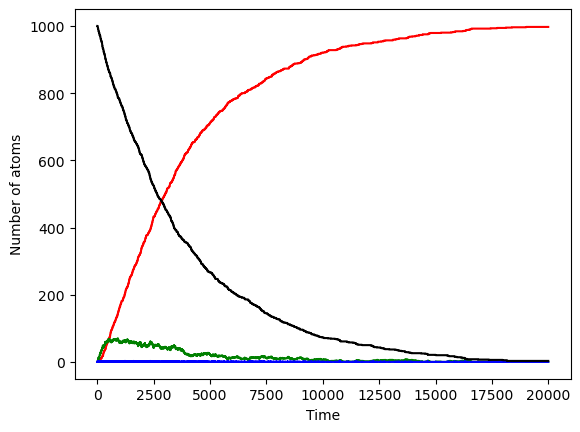

In [6]:
# Write Code Here

import numpy as np
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NTl = 0             # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau1 = 3.3*60        # Half life of Pb in seconds
tau2 = 2.2*60        # Half life of Tl in seconds
tau3 = 46*60        # Half life of Bi initial in seconds
h = 1.0               # Size of time-step in seconds ~every second~
p1 = 1 - (2**(-h/tau1)) * .9791  # Probability of decay Pb
pb1 = 1 - (2**(-h/tau1))  # Probability of decay Pb without percent
p2 = 1 - (2**(-h/tau2)) * .0209   # Probability of decay of Tl
p3 = 1 - 2**(-h/tau3)   # Probability of decay of Bi initial
tmax = 20000           # Total time ~0 to 1000 seconds~
NBi = 1000               #Initial Number of Bi atoms ~change back to 10000 atoms~
NBf = 0               # Number of Bi final atoms

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
NBfpoints = [] # empty array to strore # of Bi final atoms at each time step
NBipoints = [] # empty array to strore # of Bi initial atoms at each time step
NPbpoints = []
NTlpoints = []

# Main loop ~keeps track of time~
for t in tpoints:    # for time 0-1000 sec
    NBfpoints.append(NBf) # append starting # of Bi Final atoms
    NBipoints.append(NBi) # append starting # of Bi initial atoms
    NPbpoints.append(NPb)
    NTlpoints.append(NTl)

    # Calculate the number of atoms that decay
    decay = 0
    
    for i in range(NPb): # determine number of atoms that decay
        if np.random.random() < pb1:
            decay += 1
    NPb -= decay # subtract number of decayed Parent atoms 
    NBf += decay # add number of decayed Daughter atoms
    
    decay = 0
    
    for i in range(NTl): # determine number of atoms that decay
        if np.random.random() < p2:
            decay += 1
    NTl -= decay # subtract number of decayed Parent atoms 
    NPb += decay # add number of decayed Daughter atoms 
    
    decay = 0
    
    for i in range(NBi): # determine number of atoms that decay
        if np.random.random() < p3:
            decay += 1
            if np.random.random() == p1:
                NBi -= 1 # subtract number of decayed Parent atoms 
                NPb += 1 # add number of decayed Daughter atoms
            else:
                NBi -= 1
                NTl += 1
     
# Make the graph
plot(tpoints,NBfpoints, c='r') # plot Pb vs. time
plot(tpoints,NPbpoints, c='g') # plot Pb vs. time
plot(tpoints,NTlpoints, c='b') # plot Pb vs. time
plot(tpoints,NBipoints, c='k') # plot Pb vs. time
xlabel("Time")
ylabel("Number of atoms")
show()

## 2) Lets Make a Deal
Monte Carlo methods are often useful to ensure that our thinking is reasonable. A good
example of this kind of use is to investigate a simple problem that generated much attention
several years ago and for which many mathematicians obtained an incorrect solution.

The problem was the analysis of the optimal strategy in a television game show popular at
the time. The show was Lets Make a Deal with host Monty Hall. At some point in the show,
a contestant was given a choice of selecting one of three possible items, each concealed behind
one of three closed doors. The items varied considerably in value.

After the contestant made a choice but before the chosen door was opened, the
host, who knew where the most valuable item was, would open one of the doors
not selected and reveal a worthless item.

**The host would then offer to let the contestant select a different door from what was originally
selected. The question, of course, is should the contestant switch?**

<img src="Monty_Hall_Problem.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />



Much interest in this problem was generated when it was analyzed by a popular magazine
writer, Marilyn vos Savant, who concluded that the optimal strategy is to switch. This
strategy is counterintuitive to many mathematicians, who would say that there is nothing to
be gained by switching; that is, that the probability of improving the selection is 0.5. Study
this problem by Monte Carlo methods. Be careful to understand all of the assumptions

**Write a code that implement this test for 1000 “games”, 500 where the contestant choose to KEEP their choice of door, and 500 where contestant chooses to CHANGE their choice of door:**


## Determine if there is probability of improving the selection by switching, and if so by how much?



In [9]:
#constants: random door and opens one wrong door, you are given the choice of keeping or changing door
import numpy as np

print("Lets make a Deal!")

print("")

s_wins = 0
k_wins = 0
n_games = 1000

for i in range(n_games):
    w_door = np.random.randint(3)
    p_choice = np.random.randint(3)
    
    d_open = [door for door in range(3) if door != p_choice and door != w_door]
    r_door = np.random.choice(d_open)
    switch = np.random.choice([True,False])
    
    if switch:
        f_choice = next(door for door in range(3) if door != p_choice and door != r_door)
    else:
        f_choice = p_choice
    
    if f_choice == w_door:
        if switch:
            s_wins += 1
        else:
            k_wins += 1
    
s_probability = s_wins / n_games
k_probability = k_wins / n_games

print("Switching Probabiblity of winning is", s_probability)
print("Keeping Probabiblity of winning is", k_probability)

print("")

print("The probability of success by changing is", (s_probability / k_probability),"times greater than that of keeping the same door.")

Lets make a Deal!

Switching Probabiblity of winning is 0.34
Keeping Probabiblity of winning is 0.173

The probability of success by changing is 1.9653179190751449 times greater than that of keeping the same door.
